### Create simple, effective machine learning plots with Yellowbrick

Ref : https://towardsdatascience.com/a-simple-guide-to-machine-learning-visualisations-6c808ac925dd

 Ref : https://www.scikit-yb.org/en/latest/api/features/pca.html

An important step in developing machine learning models is to evaluate the performance. Depending on the type of machine learning problem that you are dealing with, there is generally a choice of metrics to choose from to perform this step.

However, simply looking at one or two numbers in isolation cannot always enable us to make the right choice for model selection. For example, a single error metric doesn’t give us any information about the distribution of the errors. It does not answer questions like is the model wrong in a big way a small number of times, or is it producing lots of smaller errors?

It is essential to also inspect the model performance visually, as a chart or graph can reveal information we may otherwise miss from observing a single metric.

Yellowbrick is a Python library dedicated to making it easy to create rich visualisations for machine learning models developed using Scikit-learn.

In the following article, I will give an introduction to this handy machine learning tool and provide code samples to create some of the most common machine learning visualisations.

In [1]:
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

X,y=fetch_openml(name='diabetes', return_X_y=True)

###### Confusion Matrix

A confusion matrix is a simple way to visually evaluate how often the predictions from a classifier are right.

To illustrate the confusion matrix I am using a dataset known as ‘diabetes’. This dataset consists of a number of features for patients such as body mass index, 2-Hour serum insulin measurements and age, and a column indicating if the patient has tested positive or negative for diabetes. The aim is to use this data to build a model that can predict a positive diabetes result.

In a binary classification problem, there can be four potential outcomes for a prediction that the model makes.

True positive: The model has correctly predicted the positive outcome, e.g. the patient's diabetes test was positive and the model prediction was positive.

False-positive: The model has incorrectly predicted the positive outcome, e.g. the patient's diabetes test was negative but the model prediction was positive.

True negative: The model has correctly predicted the negative outcome, e.g. the patient's diabetes test was negative and the model prediction was negative.

False-negative: The model has incorrectly predicted the negative outcome, e.g. the patient's diabetes test was positive but the model prediction was negative.

The confusion matrix visualises the count of each of these possible outcomes in a grid. The below code uses the Yellowbrick ConfusionMatrix visualiser to generate a confusion matrix for the model.


Bad key text.latex.preview in file C:\Users\Owner\Anaconda3\envs\udacity\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Owner\Anaconda3\envs\udacity\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Owner\Anaconda3\envs\udacity\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the

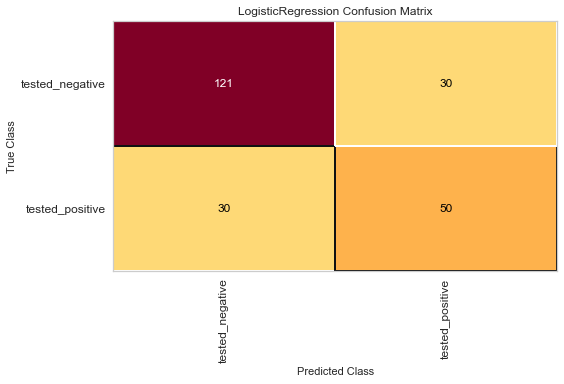

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
cm=ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

###### ROC Curves

The initial output of a classifier is not a label, instead, it is the probability that a particular observation belongs to a certain class.

This probability is then turned into a class by selecting a threshold. For example, we might say that if the probability of the patient testing positive is above 0.5 then we assign the positive label.

Depending on the model, data and use case, we may choose a threshold to optimise for a particular outcome. In the diabetes example, missing a positive result could potentially be life-threatening so we would want to minimise the false negatives. Changing the threshold for a classifier is one way to optimise this outcome, and the ROC curve is one way to visualise this trade-off.

The code below uses Yellowbrick to construct a ROC curve.

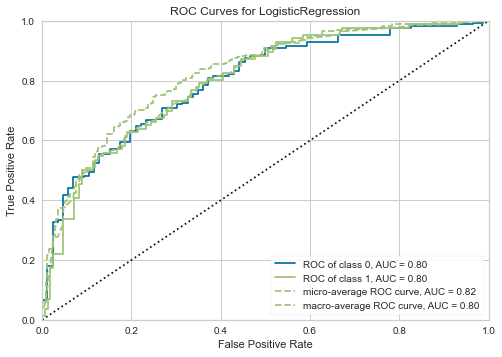

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC

y=LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)
model=LogisticRegression()

visualizer=ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

The ROC curve plots the true positive rate against the false-positive rate. Using this we can evaluate the impact of lowering or raising the classification threshold.

###### Precision-Recall Curve

ROC curves are not always the best way to evaluate a classifier. If the class is imbalanced (one class has many more observations compared to another) the results of a ROC curve can be misleading.

The precision-recall curve is often a better choice in these situations.

Let’s quickly recap what we mean by precision and recall.

Precision measures how good the model is at correctly identifying the positive class. In other words out of all predictions for the positive class how many were actually correct?

Recall tell us how good the model is at correctly predicting all the positive observations in the dataset.

There is often a trade-off between precision and recall. You may increase precision at the expense of decreasing recall for example.

A precision-recall curve displays this trade-off at different classification thresholds.

The code below uses the Yellowbrick library to generate a precision-recall curve for the diabetes classifier.

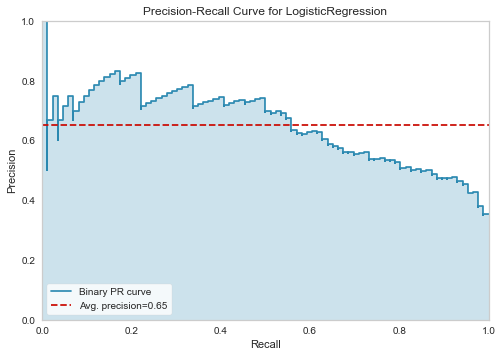

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [4]:
from yellowbrick.classifier import PrecisionRecallCurve

viz=PrecisionRecallCurve(LogisticRegression(random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

###### InterCluster Distance

The Yellowbrick library also contains a set of visualisation tools for analysing clustering algorithms. A common way to evaluate the performance of clustering models is with an intercluster distance map.

The intercluster distance map plots an embedding of each cluster centre and visualises both the distance between the clusters and the relative size of each cluster based on membership.

We can turn the diabetes dataset into a clustering problem by only using the features (X).

Before we cluster the data we can use the popular elbow method to find the optimal number of clusters. Yellowbrick has a method for this.

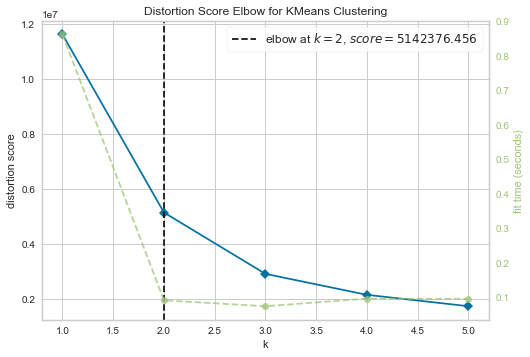

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model=KMeans()

visualizer=KElbowVisualizer(model, k=(1,6))
visualizer.fit(X)
visualizer.show()

The elbow curve suggests that two clusters are optimal.

Now let’s plot the inter-cluster map for the dataset, choosing two clusters.

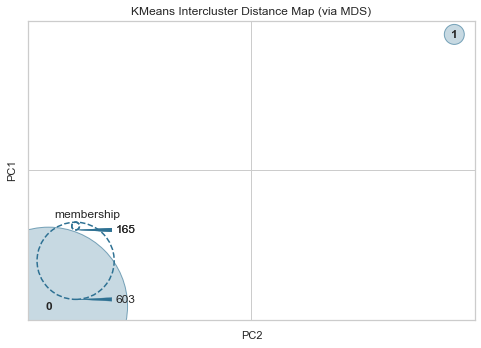

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

model=KMeans(2)
visualizer=InterclusterDistance(model)
visualizer.fit(X)
visualizer.show()

We can see from this that there is a lot of separation between the two clusters. The membership suggests that there is one cluster that has 165 observations and another with 603. This is quite close to the balance of the two classes in the diabetes dataset which is 268 and 500 observations each.

###### Residual Plot

Regression-based machine learning models have their own set of visualisations. Yellowbrick also provides support for these.

To illustrate the visualisations for regression problems we will use a variation on the diabetes dataset which can be obtained via the Scikit-learn API. This dataset has similar features to the one used earlier in this article, but the target is a quantitative measure of disease progression one year after baseline.

In regression, visualising the residuals is one method to analyse the performance of the model. The residuals are the difference between the observed value and the value predicted by the model. They are one way to quantify the error in a regression model.

The code below produces a residual plot for a simple regression model.

In [7]:
from sklearn.datasets import load_diabetes
X,y=load_diabetes(return_X_y=True)

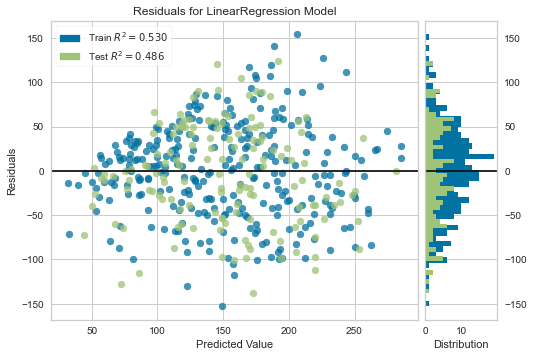

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, shuffle=True)
model=LinearRegression()
viz=residuals_plot(model, X_train, y_train, X_test, y_test)

Other available visualisations for regression-based models from the Yellowbrick library include:

- Prediction error plot.
- Alpha selection.
- Cook’s distance.

The Yellowbrick Python library offers a lightning-fast way to create machine learning visualisations for models developed using Scikit-learn. In addition to the visualisations for evaluating model performance, Yellowbrick also has tools for visualising cross-validation, learning curves and feature importances. Additionally, it provides functionality for text modelling visualisations.

As described in the article single evaluation metrics models can be useful, and in some cases, if you have a simple problem and are comparing different models it might be sufficient. However, more often than not, creating a visualisation for model performance is an important additional step to obtaining a true understanding of how effective a machine learning model is.

If you would like to read more about single evaluation metrics I have previously written an article covering evaluation metrics for classification and another for regression.

###### Cross Validation Scores

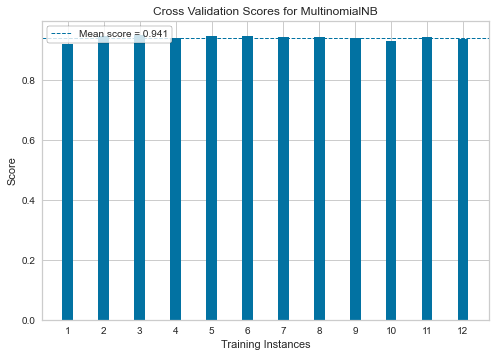

<AxesSubplot:title={'center':'Cross Validation Scores for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [9]:
## Classification
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

# Load the classification data 
X,y=load_occupancy()

#Create a cross-validation strategy 
cv=StratifiedKFold(n_splits=12, random_state=42, shuffle=True)

#Instantiate the classification model and visualizer
model_=MultinomialNB()
visualizer_=CVScores(model_, cv=cv, scoring='f1_weighted')
visualizer_.fit(X,y) # Fit the data to the visualizer
visualizer_.show()  # Finalize and render the figure

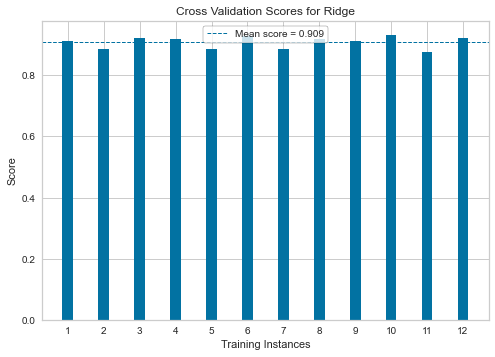

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [10]:
# Regression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import CVScores

# Load the regression dataset 
X, y=load_energy()

# Instantiate the regression model and visualizer
cv=KFold(n_splits=12, random_state=42, shuffle=True)

model=Ridge()
visualizer=CVScores(model, cv=cv, scoring='r2')

# Fit the data to the visualizer 
visualizer.fit(X, y)
# Finalize and render the figure
visualizer.show()

##### PCA Projection

The PCA Decomposition visualizer utilizes principal components analysis to decompose high dimensional data into two or three dimenstion so that each instance can be plotted in a scatter plot. The use of PCA means that the projected dataset can be analyzed along axes of principal variation and can be interpreted to determine if spherical distance metrics can be utilized.

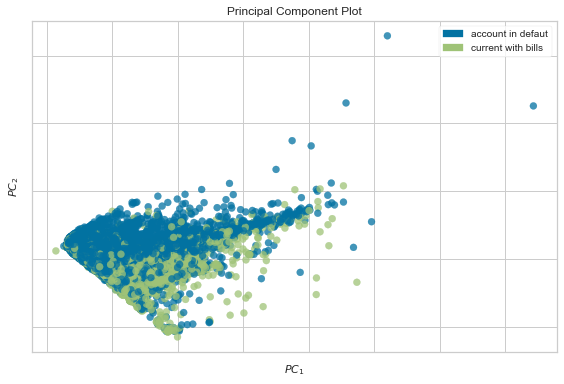

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [11]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

# Specify the feature of interest and the target 
X, y = load_credit()

classes=['account in defaut','current with bills']

visualizer=PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

The PCA projection can also be plotted in 3 dimensions to attempt to visualize more principal components and get a better sense of the distribution in high dimensions.

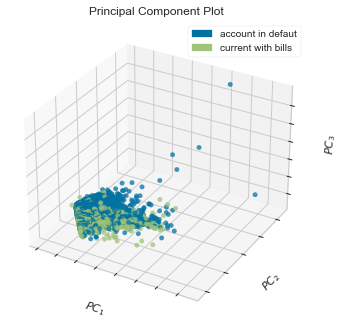

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [12]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

X, y=load_credit()
classes=['account in defaut', 'current with bills']

visualizer=PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X, y)
visualizer.show()

##### Biplot

The PCA projection can be enhanced to a biplot whose points are the projected instances and whose vectors represent the structure of the data in high dimensional space. By using project_features=True, vectors for each feature in the dataset are drawn on the scatter plot in the direction of the maximum variance for that feature. These structures can be used to analyse the importance of a feature to the decomposition or to find features of related variance for further analysis

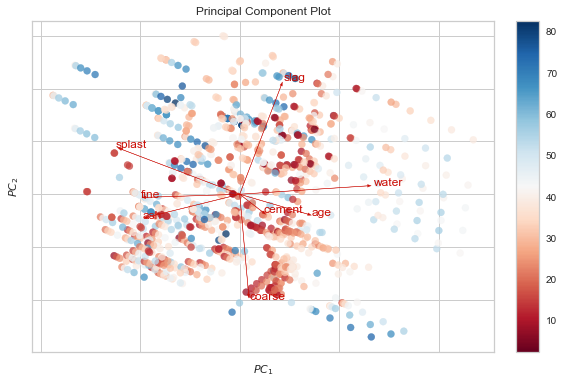

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [13]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA

# Load the concrete dataset 
X, y=load_concrete()

visualizer=PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()

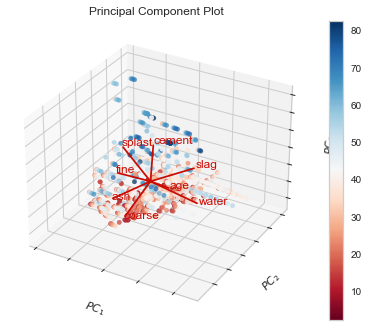

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [14]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA

X, y = load_concrete()

visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X, y)
visualizer.show()

#### Learning Curve

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

1 - How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

2- If the estimator is more sensitive to error due to variance vs. error due to bias.

Consider the following learning curves (generated with Yellowbrick, but from Plotting Learning Curves in the scikit-learn documentation):

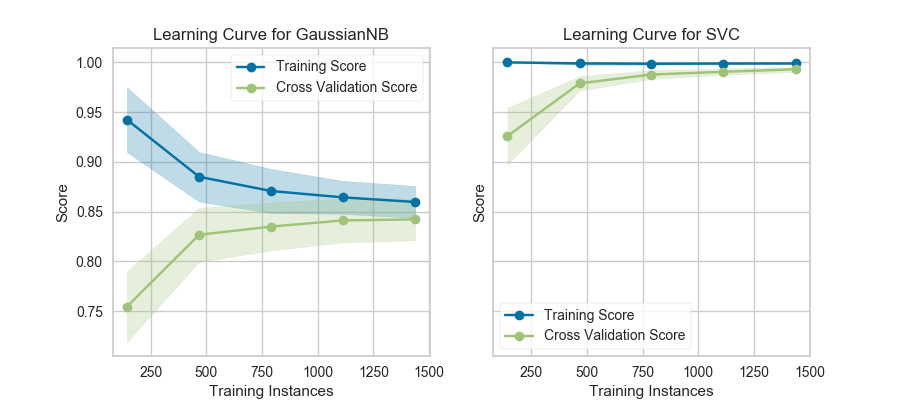

If the training and cross-validation scores converge together as more data is added (shown in the left figure), then the model will probably not benefit from more data. If the training score is much greater than the validation score then the model probably requires more training examples in order to generalize more effectively.

The curves are plotted with the mean scores, however variability during cross-validation is shown with the shaded areas that represent a standard deviation above and below the mean for all cross-validations. If the model suffers from error due to bias, then there will likely be more variability around the training score curve. If the model suffers from error due to variance, then there will be more variability around the cross validated score.

NB : Learning curves can be generated for all estimators that have fit() and predict() methods as well as a single scoring metric. This includes classifiers, regressors, and clustering as we will see in the following examples.

###### Classification - Learning Curve

In the following example, we show how to visualize the learning curve of a classification model. After loading a DataFrame and performing categorical encoding, we create a StratifiedKFold cross-validation strategy to ensure all of our classes in each split are represented with the same proportion. We then fit the visualizer using the f1_weighted scoring metric as opposed to the default metric, accuracy, to get a better sense of the relationship of precision and recall in our classifier.

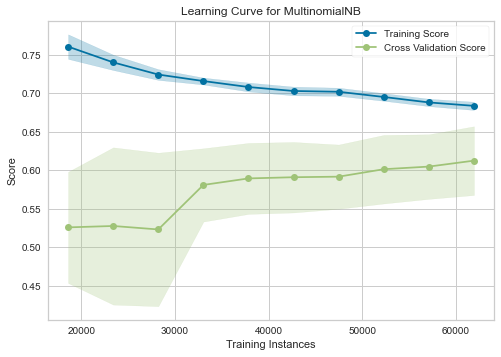

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [15]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Load a classification dataset
X, y = load_game()

# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

This learning curve shows high test variability and a low score up to around 30,000 instances, however after this level the model begins to converge on an F1 score of around 0.6. We can see that the training and test scores have not yet converged, so potentially this model would benefit from more training data. Finally, this model suffers primarily from error due to variance (the CV scores for the test data are more variable than for training data) so it is possible that the model is overfitting.

###### Learning Curve Regression

Building a learning curve for a regression is straight forward and very similar. In the below example, after loading our data and selecting our target, we explore the learning curve score according to the coefficient of determination or R2 score.

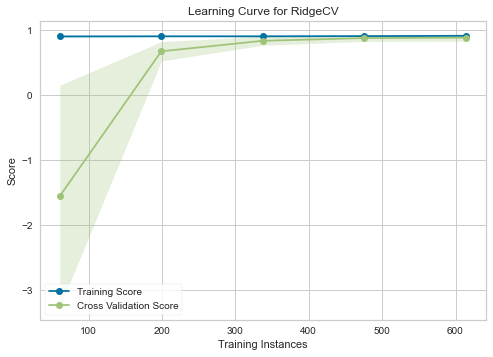

<AxesSubplot:title={'center':'Learning Curve for RidgeCV'}, xlabel='Training Instances', ylabel='Score'>

In [16]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
X, y = load_energy()

# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       

This learning curve shows a very high variability and much lower score until about 350 instances. It is clear that this model could benefit from more data because it is converging at a very high score. Potentially, with more data and a larger alpha for regularization, this model would become far less variable in the test data.

###### Clustering - Learning Curve

Learning curves also work for clustering models and can use metrics that specify the shape or organization of clusters such as silhouette scores or density scores. If the membership is known in advance, then rand scores can be used to compare clustering performance as shown below:

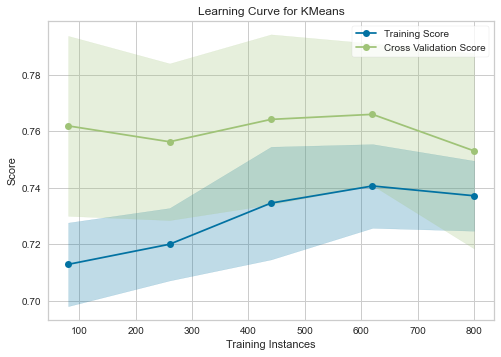

<AxesSubplot:title={'center':'Learning Curve for KMeans'}, xlabel='Training Instances', ylabel='Score'>

In [17]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.model_selection import LearningCurve

# Generate synthetic dataset with 5 random clusters
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = LearningCurve(model, scoring="adjusted_rand_score", random_state=42)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()     

Unfortunately, with random data these curves are highly variable, but serve to point out some clustering-specific items. First, note the y-axis is very narrow, roughly speaking these curves are converged and actually the clustering algorithm is performing very well. Second, for clustering, convergence for data points is not necessarily a bad thing; in fact we want to ensure as more data is added, the training and cross-validation scores do not diverge

##### Feature Importances

The feature engineering process involves selecting the minimum required features to produce a valid model because the more features a model contains, the more complex it is (and the more sparse the data), therefore the more sensitive the model is to errors due to variance. A common approach to eliminating features is to describe their relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if the model fairs better during cross-validation.

Many model forms describe the underlying impact of features relative to each other. In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a feature_importances_ attribute when fitted. The Yellowbrick FeatureImportances visualizer utilizes this attribute to rank and plot relative importances.

Let’s start with an example; first load a classification dataset.

Then we can create a new figure (this is optional, if an Axes isn’t specified, Yellowbrick will use the current figure or create one). We can then fit a FeatureImportances visualizer with a GradientBoostingClassifier to visualize the ranked features.

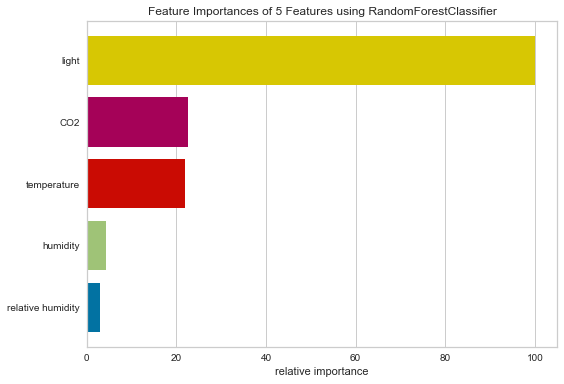

<AxesSubplot:title={'center':'Feature Importances of 5 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [18]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X, y = load_occupancy()

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

The above figure shows the features ranked according to the explained variance each feature contributes to the model. In this case the features are plotted against their relative importance, that is the percent importance of the most important feature. The visualizer also contains features_ and feature_importances_ attributes to get the ranked numeric values.

For models that do not support a feature_importances_ attribute, the FeatureImportances visualizer will also draw a bar plot for the coef_ attribute that many linear models provide.

When using a model with a coef_ attribute, it is better to set relative=False to draw the true magnitude of the coefficient (which may be negative). We can also specify our own set of labels if the dataset does not have column names or to print better titles. In the example below we title case our features for better readability:

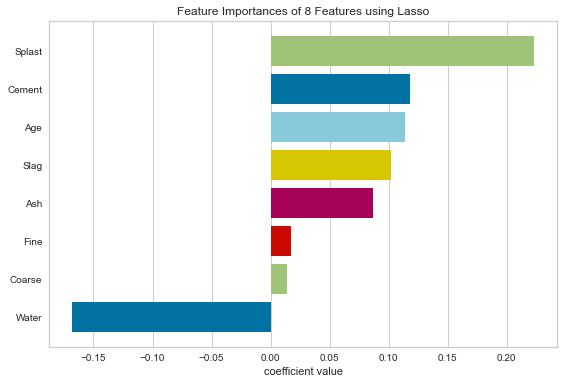

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Lasso'}, xlabel='coefficient value'>

In [19]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
dataset = load_concrete(return_dataset=True)
X, y = dataset.to_data()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), dataset.meta['features']))
viz = FeatureImportances(Lasso(), labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

The interpretation of the importance of coeficients depends on the model; see the discussion below for more details.

###### Stacked Feature Importances

Some estimators return a multi-dimensonal array for either feature_importances_ or coef_ attributes. For example the LogisticRegression classifier returns a coef_ array in the shape of (n_classes, n_features) in the multiclass case. These coefficients map the importance of the feature to the prediction of the probability of a specific class. Although the interpretation of multi-dimensional feature importances depends on the specific estimator and model family, the data is treated the same in the FeatureImportances visualizer – namely the importances are averaged.

Taking the mean of the importances may be undesirable for several reasons. For example, a feature may be more informative for some classes than others. Multi-output estimators also do not benefit from having averages taken across what are essentially multiple internal models. In this case, use the stack=True parameter to draw a stacked bar chart of importances as follows:

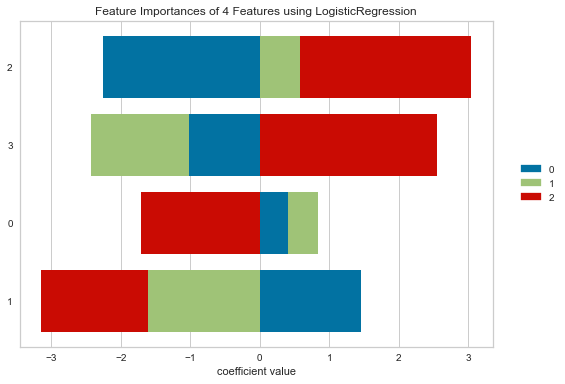

<AxesSubplot:title={'center':'Feature Importances of 4 Features using LogisticRegression'}, xlabel='coefficient value'>

In [20]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, relative=False)
viz.fit(X, y)
viz.show()

###### Top and Bottom Feature Importances

It may be more illuminating to the feature engineering process to identify the most or least informative features. To view only the N most informative features, specify the topn argument to the visualizer. Similar to slicing a ranked list by their importance, if topn is a postive integer, then the most highly ranked features are used. If topn is a negative integer, then the lowest ranked features are displayed instead.

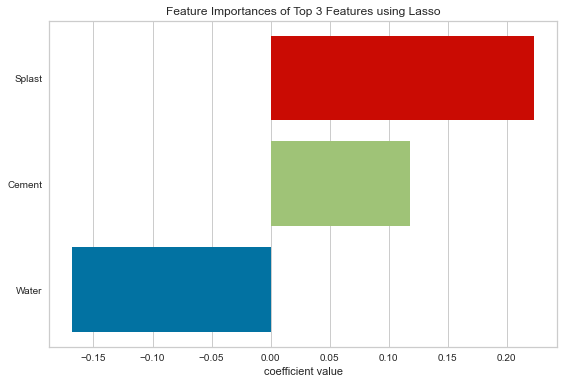

<AxesSubplot:title={'center':'Feature Importances of Top 3 Features using Lasso'}, xlabel='coefficient value'>

In [21]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
dataset = load_concrete(return_dataset=True)
X, y = dataset.to_data()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), dataset.meta['features']))
viz = FeatureImportances(Lasso(), labels=labels, relative=False, topn=3)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

Using topn=3, we can identify the three most informative features in the concrete dataset as splast, cement, and water. This approach to visualization may assist with factor analysis - the study of how variables contribute to an overall model. Note that although water has a negative coefficient, it is the magnitude (absolute value) of the feature that matters since we are closely inspecting the negative correlation of water with the strength of concrete. Alternatively, topn=-3 would reveal the three least informative features in the model. This approach is useful to model tuning similar to Recursive Feature Elimination, but instead of automatically removing features, it would allow you to identify the lowest-ranked features as they change in different model instantiations. In either case, if you have many features, using topn can significantly increase the visual and analytical capacity of your analysis.

The topn parameter can also be used when stacked=True. In the context of stacked feature importance graphs, the information of a feature is the width of the entire bar, or the sum of the absolute value of all coefficients contained therein.

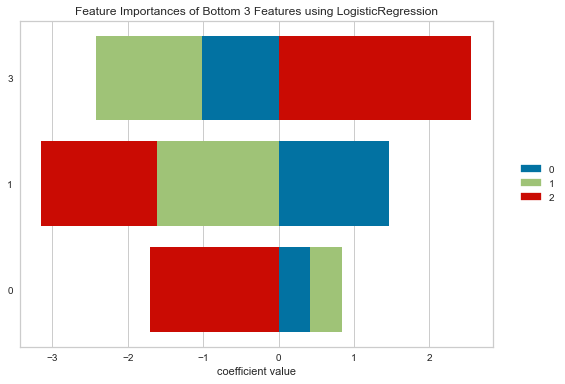

<AxesSubplot:title={'center':'Feature Importances of Bottom 3 Features using LogisticRegression'}, xlabel='coefficient value'>

In [22]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, relative=False, topn=-3)
viz.fit(X, y)
viz.show()

##### Quick Method

The same functionality above can be achieved with the associated quick method feature_importances. This method will build the FeatureImportances object with the associated arguments, fit it, then (optionally) immediately show it.

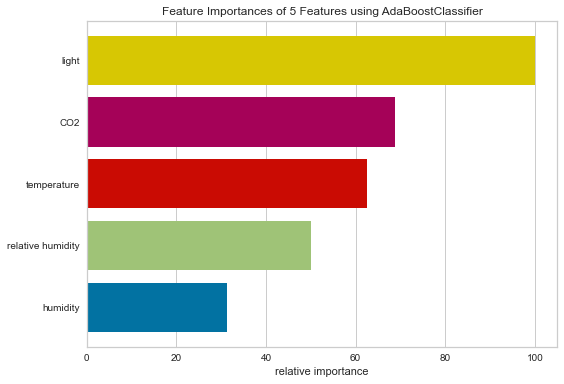

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 5 Features using AdaBoostClassifier'}, xlabel='relative importance'>,
                   estimator=AdaBoostClassifier())

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import feature_importances

# Load dataset
X, y = load_occupancy()

# Use the quick method and immediately show the figure
feature_importances(AdaBoostClassifier(), X, y)

##### Target Visualizers

Target visualizers specialize in visually describing the dependent variable for supervised modeling, often referred to as y or the target.

##### Class Balance

One of the biggest challenges for classification models is an imbalance of classes in the training data. Severe class imbalances may be masked by relatively good F1 and accuracy scores – the classifier is simply guessing the majority class and not making any evaluation on the underrepresented class

There are several techniques for dealing with class imbalance such as stratified sampling, down sampling the majority class, weighting, etc. But before these actions can be taken, it is important to understand what the class balance is in the training data. The ClassBalance visualizer supports this by creating a bar chart of the support for each class, that is the frequency of the classes’ representation in the dataset.

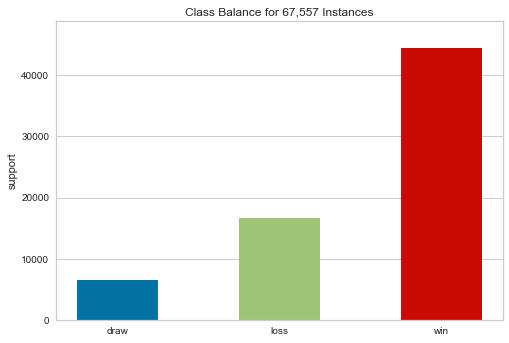

<AxesSubplot:title={'center':'Class Balance for 67,557 Instances'}, ylabel='support'>

In [24]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The resulting figure allows us to diagnose the severity of the balance issue. In this figure we can see that the "win" class dominates the other two classes. One potential solution might be to create a binary classifier: "win" vs "not win" and combining the "loss" and "draw" classes into one class.

The ClassBalance visualizer interface has changed in version 0.9, a classification model is no longer required to instantiate the visualizer, it can operate on data only. Additionally, the signature of the fit method has changed from fit(X, y=None) to fit(y_train, y_test=None), passing in X is no longer required.

If a class imbalance must be maintained during evaluation (e.g. the event being classified is actually as rare as the frequency implies) then stratified sampling should be used to create train and test splits. This ensures that the test data has roughly the same proportion of classes as the training data. While scikit-learn does this by default in train_test_split and other cv methods, it can be useful to compare the support of each class in both splits.

The ClassBalance visualizer has a “compare” mode, where the train and test data can be passed to fit(), creating a side-by-side bar chart instead of a single bar chart as follows:

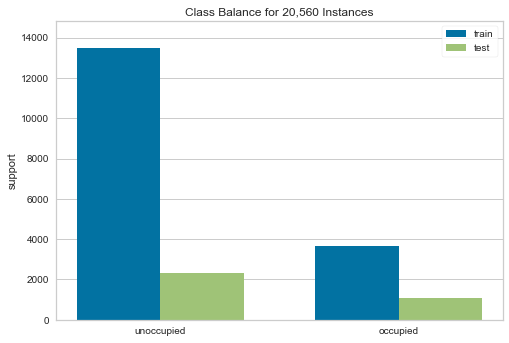

<AxesSubplot:title={'center':'Class Balance for 20,560 Instances'}, ylabel='support'>

In [25]:
from sklearn.model_selection import TimeSeriesSplit

from yellowbrick.datasets import load_occupancy
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_occupancy()

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

This visualization allows us to do a quick check to ensure that the proportion of each class is roughly similar in both splits. This visualization should be a first stop particularly when evaluation metrics are highly variable across different splits.

###### Quick Method

The same functionalities above can be achieved with the associated quick method class_balance. This method will build the ClassBalance object with the associated arguments, fit it, then (optionally) immediately show it.

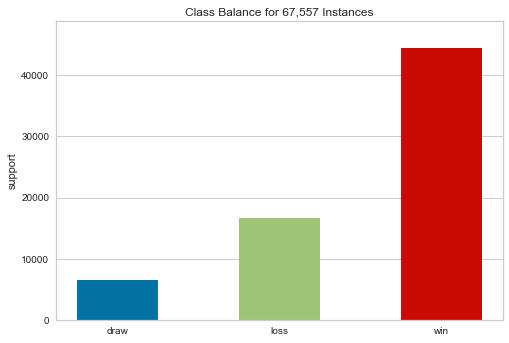

ClassBalance(ax=<AxesSubplot:title={'center':'Class Balance for 67,557 Instances'}, ylabel='support'>)

In [26]:
from yellowbrick.datasets import load_game
from yellowbrick.target import class_balance

# Load the dataset
X, y = load_game()

# Use the quick method and immediately show the figure
class_balance(y)

##### Feature Correlation

This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

###### Pearson Correlation

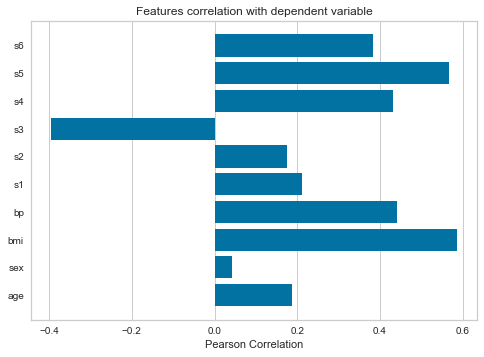

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [27]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
data = datasets.load_diabetes()
X, y = data['data'], data['target']

# Create a list of the feature names
features = np.array(data['feature_names'])

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

###### Mutual Information - Regression

Mutual information between features and the dependent variable is calculated with sklearn.feature_selection.mutual_info_classif when method='mutual_info-classification' and mutual_info_regression when method='mutual_info-regression'. It is very important to specify discrete features when calculating mutual information because the calculation for continuous and discrete variables are different. See scikit-learn documentation for more details.

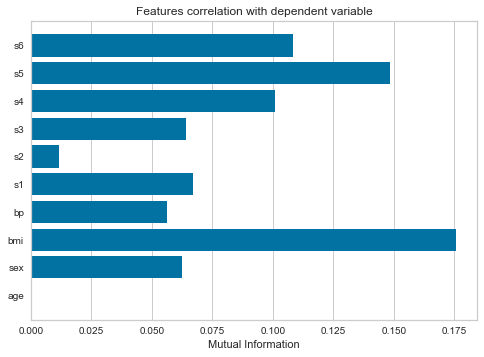

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [28]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
data = datasets.load_diabetes()
X, y = data['data'], data['target']

# Create a list of the feature names
features = np.array(data['feature_names'])

# Create a list of the discrete features
discrete = [False for _ in range(len(features))]
discrete[1] = True

# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features)

visualizer.fit(X, y, discrete_features=discrete, random_state=0)
visualizer.show()

###### Mutual Information - Classification

By fitting with a pandas DataFrame, the feature labels are automatically obtained from the column names. This visualizer also allows sorting of the bar plot according to the calculated mutual information (or Pearson correlation coefficients) and selecting features to plot by specifying the names of the features or the feature index.

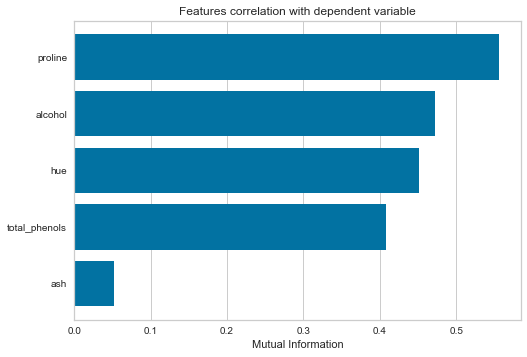

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [29]:
import pandas as pd

from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
data = datasets.load_wine()
X, y = data['data'], data['target']
X_pd = pd.DataFrame(X, columns=data['feature_names'])

# Create a list of the features to plot
features = ['alcohol', 'ash', 'hue', 'proline', 'total_phenols']

# Instaniate the visualizer
visualizer = FeatureCorrelation(
    method='mutual_info-classification', feature_names=features, sort=True
)

visualizer.fit(X_pd, y)        # Fit the data to the visualizer
visualizer.show()          

###### Quick Method

The same functionality above can be achieved with the associated quick method feature_correlation. This method will build the FeatureCorrelation object with the associated arguments, fit it, then (optionally) immediately show it

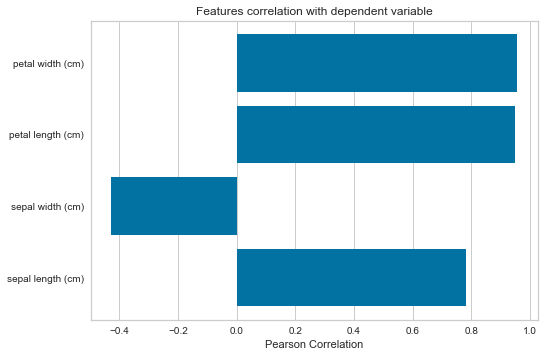

<Figure size 576x396 with 0 Axes>

In [30]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from yellowbrick.target.feature_correlation import feature_correlation

#Load the diabetes dataset
data = datasets.load_iris()
X, y = data['data'], data['target']

features = np.array(data['feature_names'])
visualizer = feature_correlation(X, y, labels=features)
plt.tight_layout()